In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scripts.pygravlens as gl

from astropy.cosmology import Planck18 as cosmo

Take the same SIS as before and add external shear to break the symmetry. Shear can be specified as a combination of `gammac` (stretching aligned with the axes) or `gammas` (stretching along the 45-deg diagonals).

number of planes: 1
maingrid: [[-2.5, 2.5, 20], [-2.5, 2.5, 20]]
galgrid: [1e-06, 2.5, 20, 20]


c:\Users\satya\Documents\GravLensing\pygravlens.py:1641: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


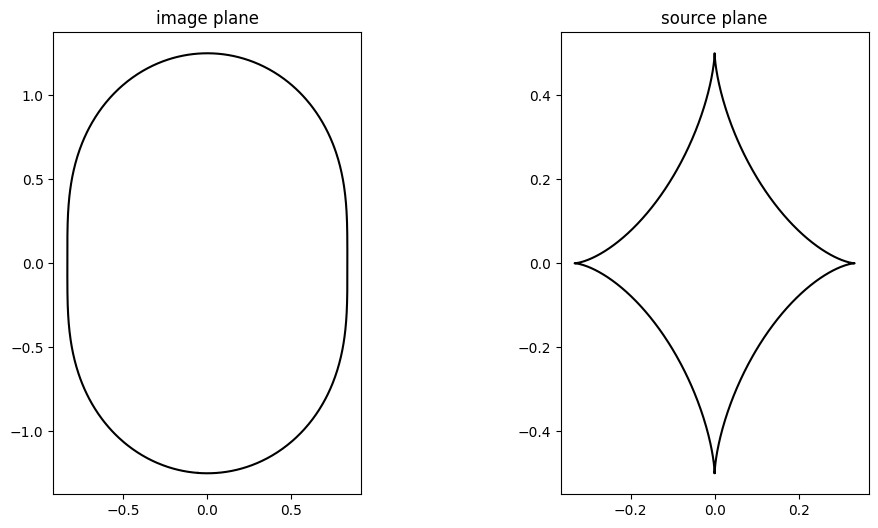

In [2]:
plane = gl.lensplane('SIS',[0.0,0.0,1.0],gammac=0.2)
model = gl.lensmodel([plane])
model.info()
model.tile()
model.plot()

Solve the lens equation for a sample source.

In [3]:
imgarr,muarr = model.findimg([0.1,0.1])
print('positions')
print(imgarr)
print('magnifications')
print(muarr)

ValueError: too many values to unpack (expected 2)

We can include a source when plotting. Here the source and images are plotted in red.

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


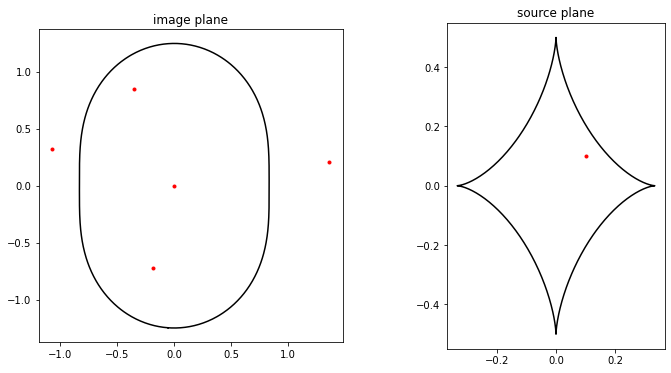

In [ ]:
model.plot(src=[0.1,0.1])

We can even include multiple sources. Here each source/image set is a different color.

/Users/chuckkeeton/projects/pygravlens/pygravlens.py:1237: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


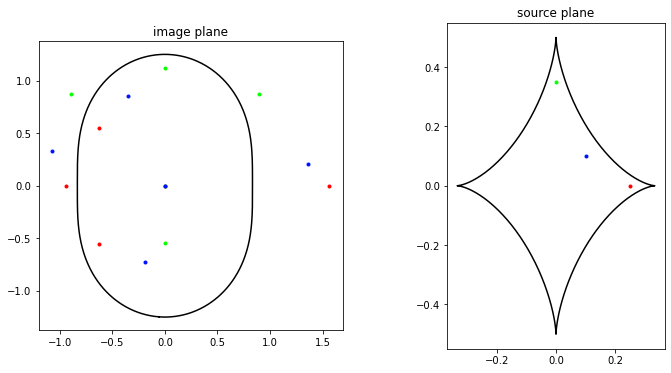

In [ ]:
model.plot(src=[[0.25,0.0],[0.0,0.35],[0.1,0.1]])

Let's see what happens when the source gets bigger; we can do that by creating a set of concentric sources with different sizes

/Users/chuckkeeton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


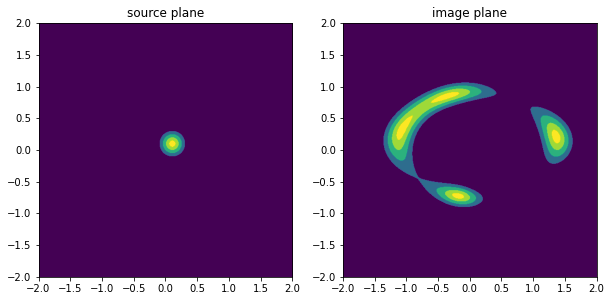

In [ ]:
lo = -2
hi = 2
npix = 500

srcarr = [ [0.1, 0.1, 0.05*i, i+1] for i in range(5) ]

srcmap,imgmap = model.extendedimg(srcmode='disk',srcarr=srcarr,extent=[[lo,hi,npix],[lo,hi,npix]])

f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(srcmap,origin='lower',extent=[lo,hi,lo,hi])
ax[0].set_title('source plane')
ax[1].imshow(imgmap,origin='lower',extent=[lo,hi,lo,hi])
ax[1].set_title('image plane')
f.show()

# Elliptical power law model

In [ ]:
zlens = 0.6
zsrc = 1.8

Dlens = cosmo.comoving_distance(zlens)
Dsrc = cosmo.comoving_distance(zsrc)

plane = gl.lensplane('ellpow',[0.0,0.0,1.0,1.0,0.3,0.2],Dl=Dlens)
model = gl.lensmodel([plane],Ds=Dsrc)
model.info()
model.tile()

imgarr,muarr,dtarr = model.findimg([0.1,0.02])
print('image positions')
print(imgarr)
print('magnifications')
print(muarr)
print('time delays')
print(dtarr)

number of planes: 1
maingrid: [[-2.5, 2.5, 20], [-2.5, 2.5, 20]]
galgrid: [1e-06, 2.5, 20, 20]
image positions
[[ 0.75877783 -1.11482815]
 [ 0.03879107  1.32926758]
 [ 1.17719911  0.3961405 ]
 [-0.99999827 -0.28241802]]
magnifications
[ 4.20058078  4.45323169 -3.87256823 -1.98173252]
time delays
[ 0.          2.92372143 16.08941992 43.09181674] d
